In [2]:
import getkey
import matplotlib.pyplot as plt
import json
from geopy.distance import geodesic

In [2]:
city = "Taipei"
api_url = f"https://tdx.transportdata.tw/api/basic/v2/Bus/RealTimeByFrequency/City/{city}?%24format=JSON"

getkey.getjson(api_url, 'test-freq')
    
    

In [3]:
bus_data = ""
with open('data/test-freq.json', 'r', encoding='utf-8') as f:
    bus_data = json.load(f)
    

In [4]:
bus_data

[{'PlateNumb': '005-U3',
  'OperatorID': '800',
  'OperatorNo': '0303',
  'RouteUID': 'TPE10844',
  'RouteID': '10844',
  'RouteName': {'Zh_tw': '652', 'En': '652'},
  'SubRouteUID': 'TPE108440',
  'SubRouteID': '108440',
  'SubRouteName': {'Zh_tw': '652', 'En': '652'},
  'Direction': 0,
  'BusPosition': {'PositionLon': 121.44459,
   'PositionLat': 25.052828,
   'GeoHash': 'wsqqe89r2'},
  'Speed': 23.0,
  'Azimuth': 174.0,
  'DutyStatus': 1,
  'BusStatus': 0,
  'GPSTime': '2024-05-28T20:23:36+08:00',
  'SrcUpdateTime': '2024-05-28T20:23:50+08:00',
  'UpdateTime': '2024-05-28T20:23:52+08:00'},
 {'PlateNumb': '007-U3',
  'OperatorID': '800',
  'OperatorNo': '0303',
  'RouteUID': 'TPE10844',
  'RouteID': '10844',
  'RouteName': {'Zh_tw': '652', 'En': '652'},
  'SubRouteUID': 'TPE108440',
  'SubRouteID': '108440',
  'SubRouteName': {'Zh_tw': '652', 'En': '652'},
  'Direction': 0,
  'BusPosition': {'PositionLon': 121.51108,
   'PositionLat': 25.048077,
   'GeoHash': 'wsqqmpcet'},
  'Speed':

In [5]:
target_location = (25.033964, 121.564472)
radius = 1.0

filtered_data = []
for item in bus_data:
    bus_location = (item['BusPosition']['PositionLat'], item['BusPosition']['PositionLon'])
    if geodesic(target_location, bus_location).km <= radius:
        filtered_data.append({
            "Latitude": bus_location[0],
            "Longitude": bus_location[1]
        })

In [6]:
df

NameError: name 'df' is not defined

/Users/chiyune/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chiyune/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


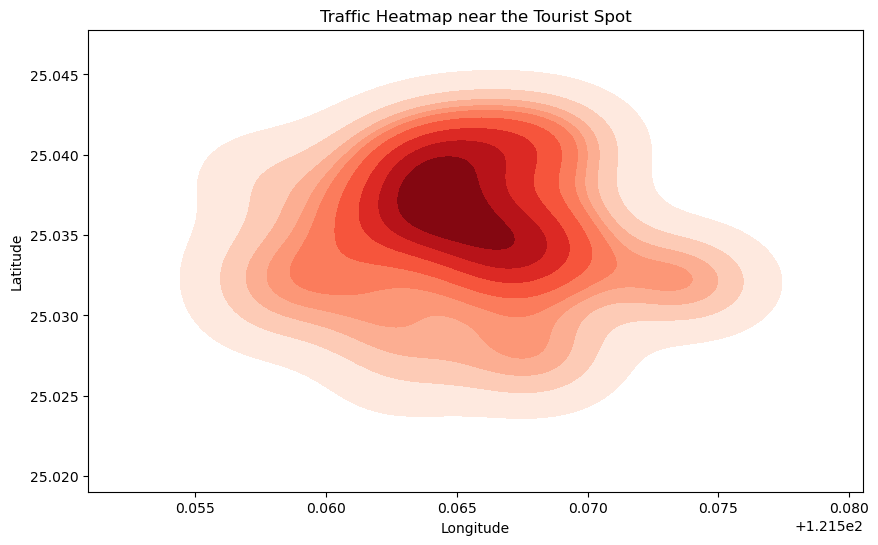

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium
from folium.plugins import HeatMap

# 假設 filtered_data 是篩選後的包含經緯度和交通密度的數據框
df = pd.DataFrame(filtered_data)

plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Longitude'], y=df['Latitude'], fill=True, cmap="Reds")

plt.title('Traffic Heatmap near the Tourist Spot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [9]:
target_location = (25.033964, 121.564472)  # 台北101的經緯度
radius = 1.0  # 公里

filtered_data = []
for item in bus_data:
    bus_location = (item['BusPosition']['PositionLat'], item['BusPosition']['PositionLon'])
    if geodesic(target_location, bus_location).km <= radius:
        filtered_data.append((bus_location[0], bus_location[1]))
        
# 創建地圖
m = folium.Map(location=target_location, zoom_start=15)

heatmap_layer = folium.FeatureGroup(name='Bus Traffic Heatmap')
HeatMap(filtered_data).add_to(heatmap_layer)

# 將熱圖子層添加到地圖
heatmap_layer.add_to(m)

# 添加圖層控制
folium.LayerControl().add_to(m)



m

In [10]:
Taiwan_map = folium.Map(location=[23.800983, 120.772569], tiles='openstreetmap', zoom_start=7.3)
HeatMap(data).add_to(m)
Taiwan_map